# OCTIS Models Evaluation

## Prologue & Imports

We will evaluate the performance of most relevant OCTIS models as a baseline for non-SOTA Topic Modeling. These models will be compared on the same preprocessed dataset, the same number of topics and the same evaluation metrics.

In [1]:
from octis.models.LSI import LSI
from octis.models.NMF import NMF
from octis.models.LDA import LDA
from octis.models.HDP import HDP
from octis.models.NeuralLDA import NeuralLDA
from octis.models.ProdLDA import ProdLDA
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.similarity_metrics import RBO, PairwiseJaccardSimilarity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

from models.octis.config.models import NUM_TOPICS, lsi_params, nmf_params, lda_params, hdp_params, neural_lda_params, prod_lda_params
from models.octis.config.optimization import TOP_K, NUM_PROCESSES
from models.octis.utils.model_evaluator import OCTISModelEvaluator

import pandas as pd

## Dataset Loading

Our dataset has already been preprocessed in the `analysis` notebook, so we will load it directly.

In [2]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder('models/octis/data/dataset')
print("Dataset found cached - loading...")

Dataset found cached - loading...


In [3]:
corpus = dataset.get_corpus()

## Evaluation Metrics

In [4]:
coherence_npmi = Coherence(texts=corpus, topk=TOP_K, processes=NUM_PROCESSES, measure='c_npmi')
coherence_cv = Coherence(texts=corpus, topk=TOP_K, processes=NUM_PROCESSES, measure='c_v')
coherence_umass = Coherence(texts=corpus, topk=TOP_K, processes=NUM_PROCESSES, measure='u_mass')
coherence_uci = Coherence(texts=corpus, topk=TOP_K, processes=NUM_PROCESSES, measure='c_uci')

diversity_topic = TopicDiversity(topk=TOP_K)

similarity_rbo = RBO(topk=TOP_K)
similarity_pjs = PairwiseJaccardSimilarity()

other_metrics = [coherence_npmi, coherence_umass, coherence_uci, diversity_topic, similarity_rbo, similarity_pjs]

In [5]:
metrics = {"coherence_npmi": coherence_npmi,
           "coherence_cv": coherence_cv,
           "coherence_umass": coherence_umass,
           "coherence_uci": coherence_uci, 
           "diversity_topic": diversity_topic, 
           "similarity_rbo": similarity_rbo, 
           "similarity_pjs": similarity_pjs, 
           }

## Model Initialization

In [6]:
lsi_model = LSI(**lsi_params)
lda_model = LDA(**lda_params)
hdp_model = HDP(**hdp_params)
nmf_model = NMF(**nmf_params)
neural_lda_model = NeuralLDA(**neural_lda_params)
prod_lda_model = ProdLDA(**prod_lda_params)

In [7]:
models = {
          "lsi": lsi_model, 
          "lda": lda_model, 
          "hdp": hdp_model, 
          "nmf": nmf_model, 
          "neural_lda": neural_lda_model,
          "prod_lda": prod_lda_model
          }

## Evaluation

In [8]:
evaluator = OCTISModelEvaluator(dataset=dataset, 
                                models=models,
                                metrics=metrics,
                                topics=NUM_TOPICS,
                            )

In [9]:
evaluator.evaluate()

Epoch: [1/200]	Samples: [1896/379200]	Train Loss: 3180.8169666402955	Time: 0:00:00.160473
Epoch: [2/200]	Samples: [3792/379200]	Train Loss: 3088.536969277426	Time: 0:00:00.142961
Epoch: [3/200]	Samples: [5688/379200]	Train Loss: 3039.6421578322784	Time: 0:00:00.155141
Epoch: [4/200]	Samples: [7584/379200]	Train Loss: 3017.5266515031644	Time: 0:00:00.138626
Epoch: [5/200]	Samples: [9480/379200]	Train Loss: 3006.514788535074	Time: 0:00:00.245321
Epoch: [6/200]	Samples: [11376/379200]	Train Loss: 3002.433453652426	Time: 0:00:00.136736
Epoch: [7/200]	Samples: [13272/379200]	Train Loss: 2988.6005735759495	Time: 0:00:00.135120
Epoch: [8/200]	Samples: [15168/379200]	Train Loss: 2982.7851521294833	Time: 0:00:00.137427
Epoch: [9/200]	Samples: [17064/379200]	Train Loss: 2988.6601068037976	Time: 0:00:00.137723
Epoch: [10/200]	Samples: [18960/379200]	Train Loss: 2970.449292919304	Time: 0:00:00.136851
Epoch: [11/200]	Samples: [20856/379200]	Train Loss: 2968.1493522547466	Time: 0:00:00.159072
Epoch:

/Users/dion/Library/CloudStorage/GoogleDrive-dion.rigatos@gmail.com/My Drive/Archivio/University/Classes/Erasmus Courses/NLP/NLP Project/greek-pm-topic-modeling/src/models/octis/utils/model_evaluator.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.evaluation_df = pd.concat([self.evaluation_df, pd.DataFrame(model_metric_data)], ignore_index=True)


,model,coherence_npmi,coherence_cv,coherence_umass,coherence_uci,diversity_topic,similarity_rbo,similarity_pjs
0,lsi,0.049888,0.558465,-1.367228,-0.651657,0.571429,0.052403,0.033352
1,lda,0.108070,0.641830,-1.363471,0.125114,0.776190,0.014281,0.013230
2,hdp,-0.060232,0.465014,-2.249269,-2.814035,0.490476,0.021874,0.016238
3,nmf,0.071522,0.570306,-1.635750,-0.292256,0.514286,0.052855,0.035040
4,neural_lda,0.031428,0.572474,-1.566853,-0.845046,1.000000,0.000000,0.000000
5,prod_lda,0.050674,0.678209,-2.822026,-1.612643,0.885714,0.008928,0.006945


In [10]:
len(evaluator.model_outputs['lsi']["topics"])

30

In [11]:
len(evaluator.model_outputs['lsi']['test-topic-document-matrix'])

0

## Understanding the Results

We will now see the correlation between the evaluation metrics. Since we have NaN values, we will fill them with the column mean.

In [23]:
metric_df = evaluator.get_evaluation().drop(columns=['model'])

In [24]:
metric_df

,coherence_npmi,coherence_cv,coherence_umass,coherence_uci,diversity_topic,similarity_rbo,similarity_pjs
0,0.049888,0.558465,-1.367228,-0.651657,0.571429,0.052403,0.033352
1,0.108070,0.641830,-1.363471,0.125114,0.776190,0.014281,0.013230
2,-0.060232,0.465014,-2.249269,-2.814035,0.490476,0.021874,0.016238
3,0.071522,0.570306,-1.635750,-0.292256,0.514286,0.052855,0.035040
4,0.031428,0.572474,-1.566853,-0.845046,1.000000,0.000000,0.000000
5,0.050674,0.678209,-2.822026,-1.612643,0.885714,0.008928,0.006945


In order to understand the correlation between the evaluation metrics, we will use a correlation matrix which shows how each metric is correlated with the others.

In [25]:
metric_corr_df = metric_df.corr()
metric_corr_df

,coherence_npmi,coherence_cv,coherence_umass,coherence_uci,diversity_topic,similarity_rbo,similarity_pjs
coherence_npmi,1.000000,0.782268,0.435669,0.927350,0.307297,0.121893,0.146330
coherence_cv,0.782268,1.000000,-0.158704,0.519141,0.629273,-0.307054,-0.294339
coherence_umass,0.435669,-0.158704,1.000000,0.725299,-0.125071,0.362231,0.368125
coherence_uci,0.927350,0.519141,0.725299,1.000000,0.198968,0.242630,0.257185
diversity_topic,0.307297,0.629273,-0.125071,0.198968,1.000000,-0.810092,-0.839259
similarity_rbo,0.121893,-0.307054,0.362231,0.242630,-0.810092,1.000000,0.994080
similarity_pjs,0.146330,-0.294339,0.368125,0.257185,-0.839259,0.994080,1.000000


The following plot has been adjusted from Panos Louridas' Jupyter Notebook on Introduction to Matplotlib.
> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

In [26]:
(num_rows, num_columns) = metric_corr_df.shape

corr_matrix = np.eye(num_columns)
p_values = np.zeros([num_columns, num_columns])

for i in range(num_columns):
    for j in range(i+1, num_columns):
        (r, p) = pearsonr(metric_corr_df.iloc[:,i], metric_corr_df.iloc[:,j])
        corr_matrix[i, j] = r
        corr_matrix[j, i] = r
        p_values[i, j] = p
        p_values[j, i] = p

/var/folders/2g/zh1k9r3n3dx2qm52rm4cc7lr0000gn/T/ipykernel_81693/812576120.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  poscm = cm.get_cmap('Blues')
/var/folders/2g/zh1k9r3n3dx2qm52rm4cc7lr0000gn/T/ipykernel_81693/812576120.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  negcm = cm.get_cmap('Oranges')


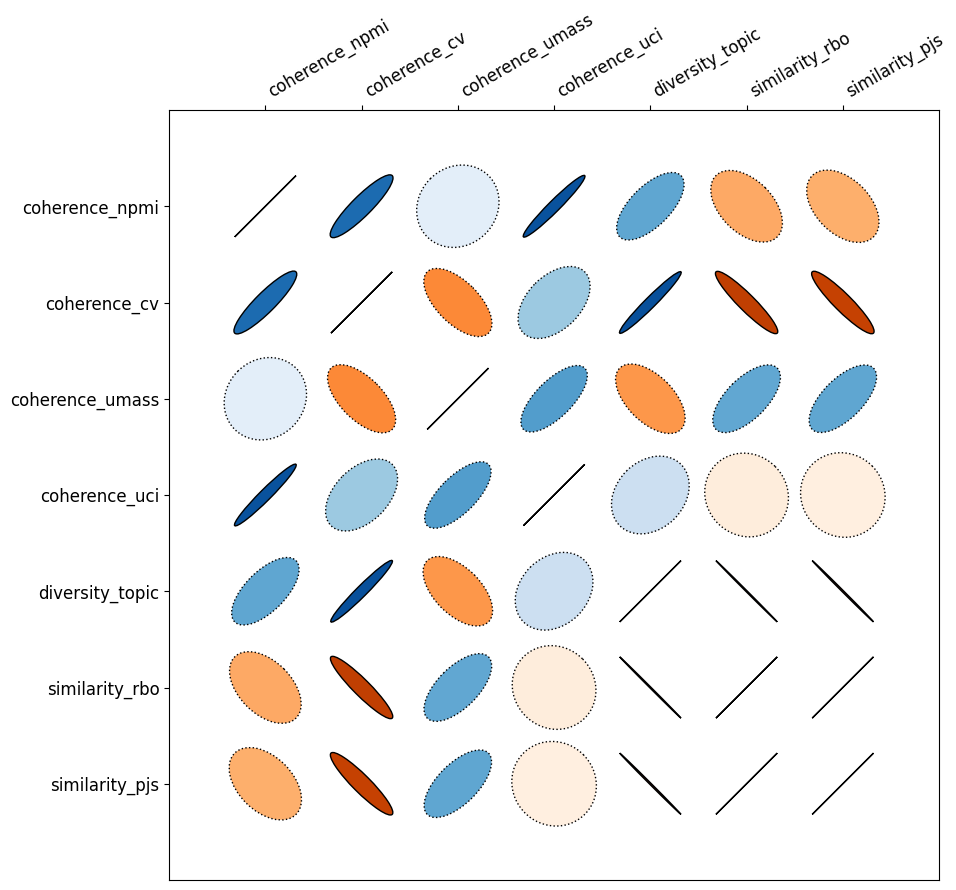

In [27]:
def corrplot(data, pvalues, labels, figure):
    ax = figure.add_subplot(1, 1, 1, aspect='equal')
    width, height = data.shape

    shrink = 0.9

    poscm = cm.get_cmap('Blues')
    negcm = cm.get_cmap('Oranges')

    for x in range(width):
        for y in range(height):
            d = data[x, y]
            c = pvalues[x, y]
            rotate = -45 if d > 0 else +45
            clrmap = poscm if d >= 0 else negcm
            d_abs = np.abs(d)
            ellipse = Ellipse((x, y),
                              width=1 * shrink,
                              height=(shrink - d_abs * shrink),
                              angle=rotate)
            ellipse.set_edgecolor('black')
            ellipse.set_facecolor(clrmap(d_abs))
            if c > 0.05:
                ellipse.set_linestyle('dotted')
            ax.add_artist(ellipse)

    ax.set_xlim(-1, width)
    ax.set_ylim(-1, height)

    ax.xaxis.tick_top()
    xtickslocs = np.arange(len(labels))
    ax.set_xticks(xtickslocs)
    ax.set_xticklabels(labels, rotation=30, fontsize=12, ha='left')

    ax.invert_yaxis()
    ytickslocs = np.arange(len(labels))
    ax.set_yticks(ytickslocs)
    ax.set_yticklabels(labels, fontsize=12)

    plt.show()

# Now use the adjusted `corrplot` function
figure = plt.figure(figsize=(10, 10))
corrplot(corr_matrix, p_values, metric_corr_df.columns, figure)

We can see that the coherence metrics are highly correlated with each other, as well as the similartiy metrics. This is not the case for the diversity metrics. We also notice a negative relation between the similarity metrics and the topic diversity, which sounds reasonable.